## Black Friday Dataset - [Link](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa0Q0a3BtYnFPMi1lRTNfYkc3WXd5UmNDNGQ0d3xBQ3Jtc0tsX3Vjb05RMXEtX19oVFk2NGxxWTdWOGVSaEVXbFhzY1B4S0ZGYTV3R0dQYlRLOUpmQkJNSXVPbzdZdHJHN3VSN2tvQlNRSExLSFpOVUQ0YWV0bV96SU5QdW4wd28xT3pCMllZbHR4Z1NadXhfLXdSQQ&q=https%3A%2F%2Fwww.kaggle.com%2Fsdolezel%2Fblack-friday) - EDA & Feature Engineering
#### Model to predict the purchase amount of customer against various products, which will help the company to create presonalized offer for customers against different products

### Cleaning and preparing data for model training

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the file
df_train = pd.read_csv('train.csv')

In [3]:
# checking the contents
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test = pd.read_csv('test.csv') # reading test file

In [5]:
df_test.head() # checking the contents

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [44]:
# merge both train and test data
df = df_train.append(df_test)
df.head() # checking contents of the appended dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [32]:
df.info() # checking info of columns (data types, no. of NULL values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [33]:
df.describe() # checking mean, min, max, etc. values of numerical columns

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [45]:
# user id is not useful, dropping the column
df.drop(['User_ID'], axis = 1, inplace = True)

In [46]:
# handling categorical feature Gender - converting F = 1, and M = 0
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df[['Gender']].head()

,Gender
0,0
1,0
2,0
3,0
4,1


In [47]:
# handling categorical feature Age by encoding
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [48]:
# label encoding
# from sklearn import preprocessing
# lab_encoder = preprocessing.LabelEncoder()
# df['Age'] = lab_encoder.fit_transform(df['Age'])
# df['Age'].unique()

In [49]:
# assigning different integers to different age-groups
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, 
                           '36-45':4 , '46-50':5, '51-55': 6, '55+': 7})

In [50]:
df['Age'].unique() # checking if encoded successfully by seeing unique values

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [51]:
# handling categorical feature City_Category
df_city = pd.get_dummies(df['City_Category'], drop_first = True) # creating dummy variables for city category

In [52]:
df = pd.concat([df, df_city], axis = 1) # concating the generated dummies for City_Category column with original dataset

In [53]:
# drop city_category
df.drop('City_Category', axis = 1, inplace = True)

In [54]:
df.isnull().sum() # checking of NULL values in columns

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

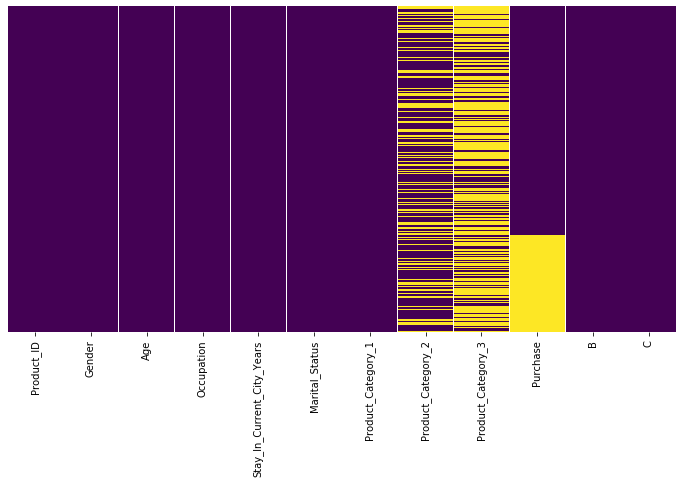

In [57]:
# plotting heatmap to visualize null values in the data set
plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

The NULLs in `Purchase` column are from the test data

In [58]:
# replacing the missing values in Product_Category_2
df['Product_Category_2'].unique() # checking unique values

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [59]:
df['Product_Category_2'].value_counts() # checking count of each unique value

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [60]:
# replace the missing values in Product_Category_2 column with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [65]:
df['Product_Category_3'].unique() # again checking unique values

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [63]:
df['Product_Category_3'].value_counts() # checking count of each unique value

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [66]:
# replacing the NULL values in Product_Category_3 with column's mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum() # checking NULL values in column

0

In [130]:
# checking unique values in Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years'].unique() 

array([2, 4, 3, 1, 0])

In [69]:
# replacing '+' sign with blank string to easily convert the column to numeric type
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [71]:
df['Stay_In_Current_City_Years'].unique() # checking unique values

array(['2', '4', '3', '1', '0'], dtype=object)

In [73]:
# convert object into integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df.info() # checking column data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 88.8+ MB


### Visualization of Features

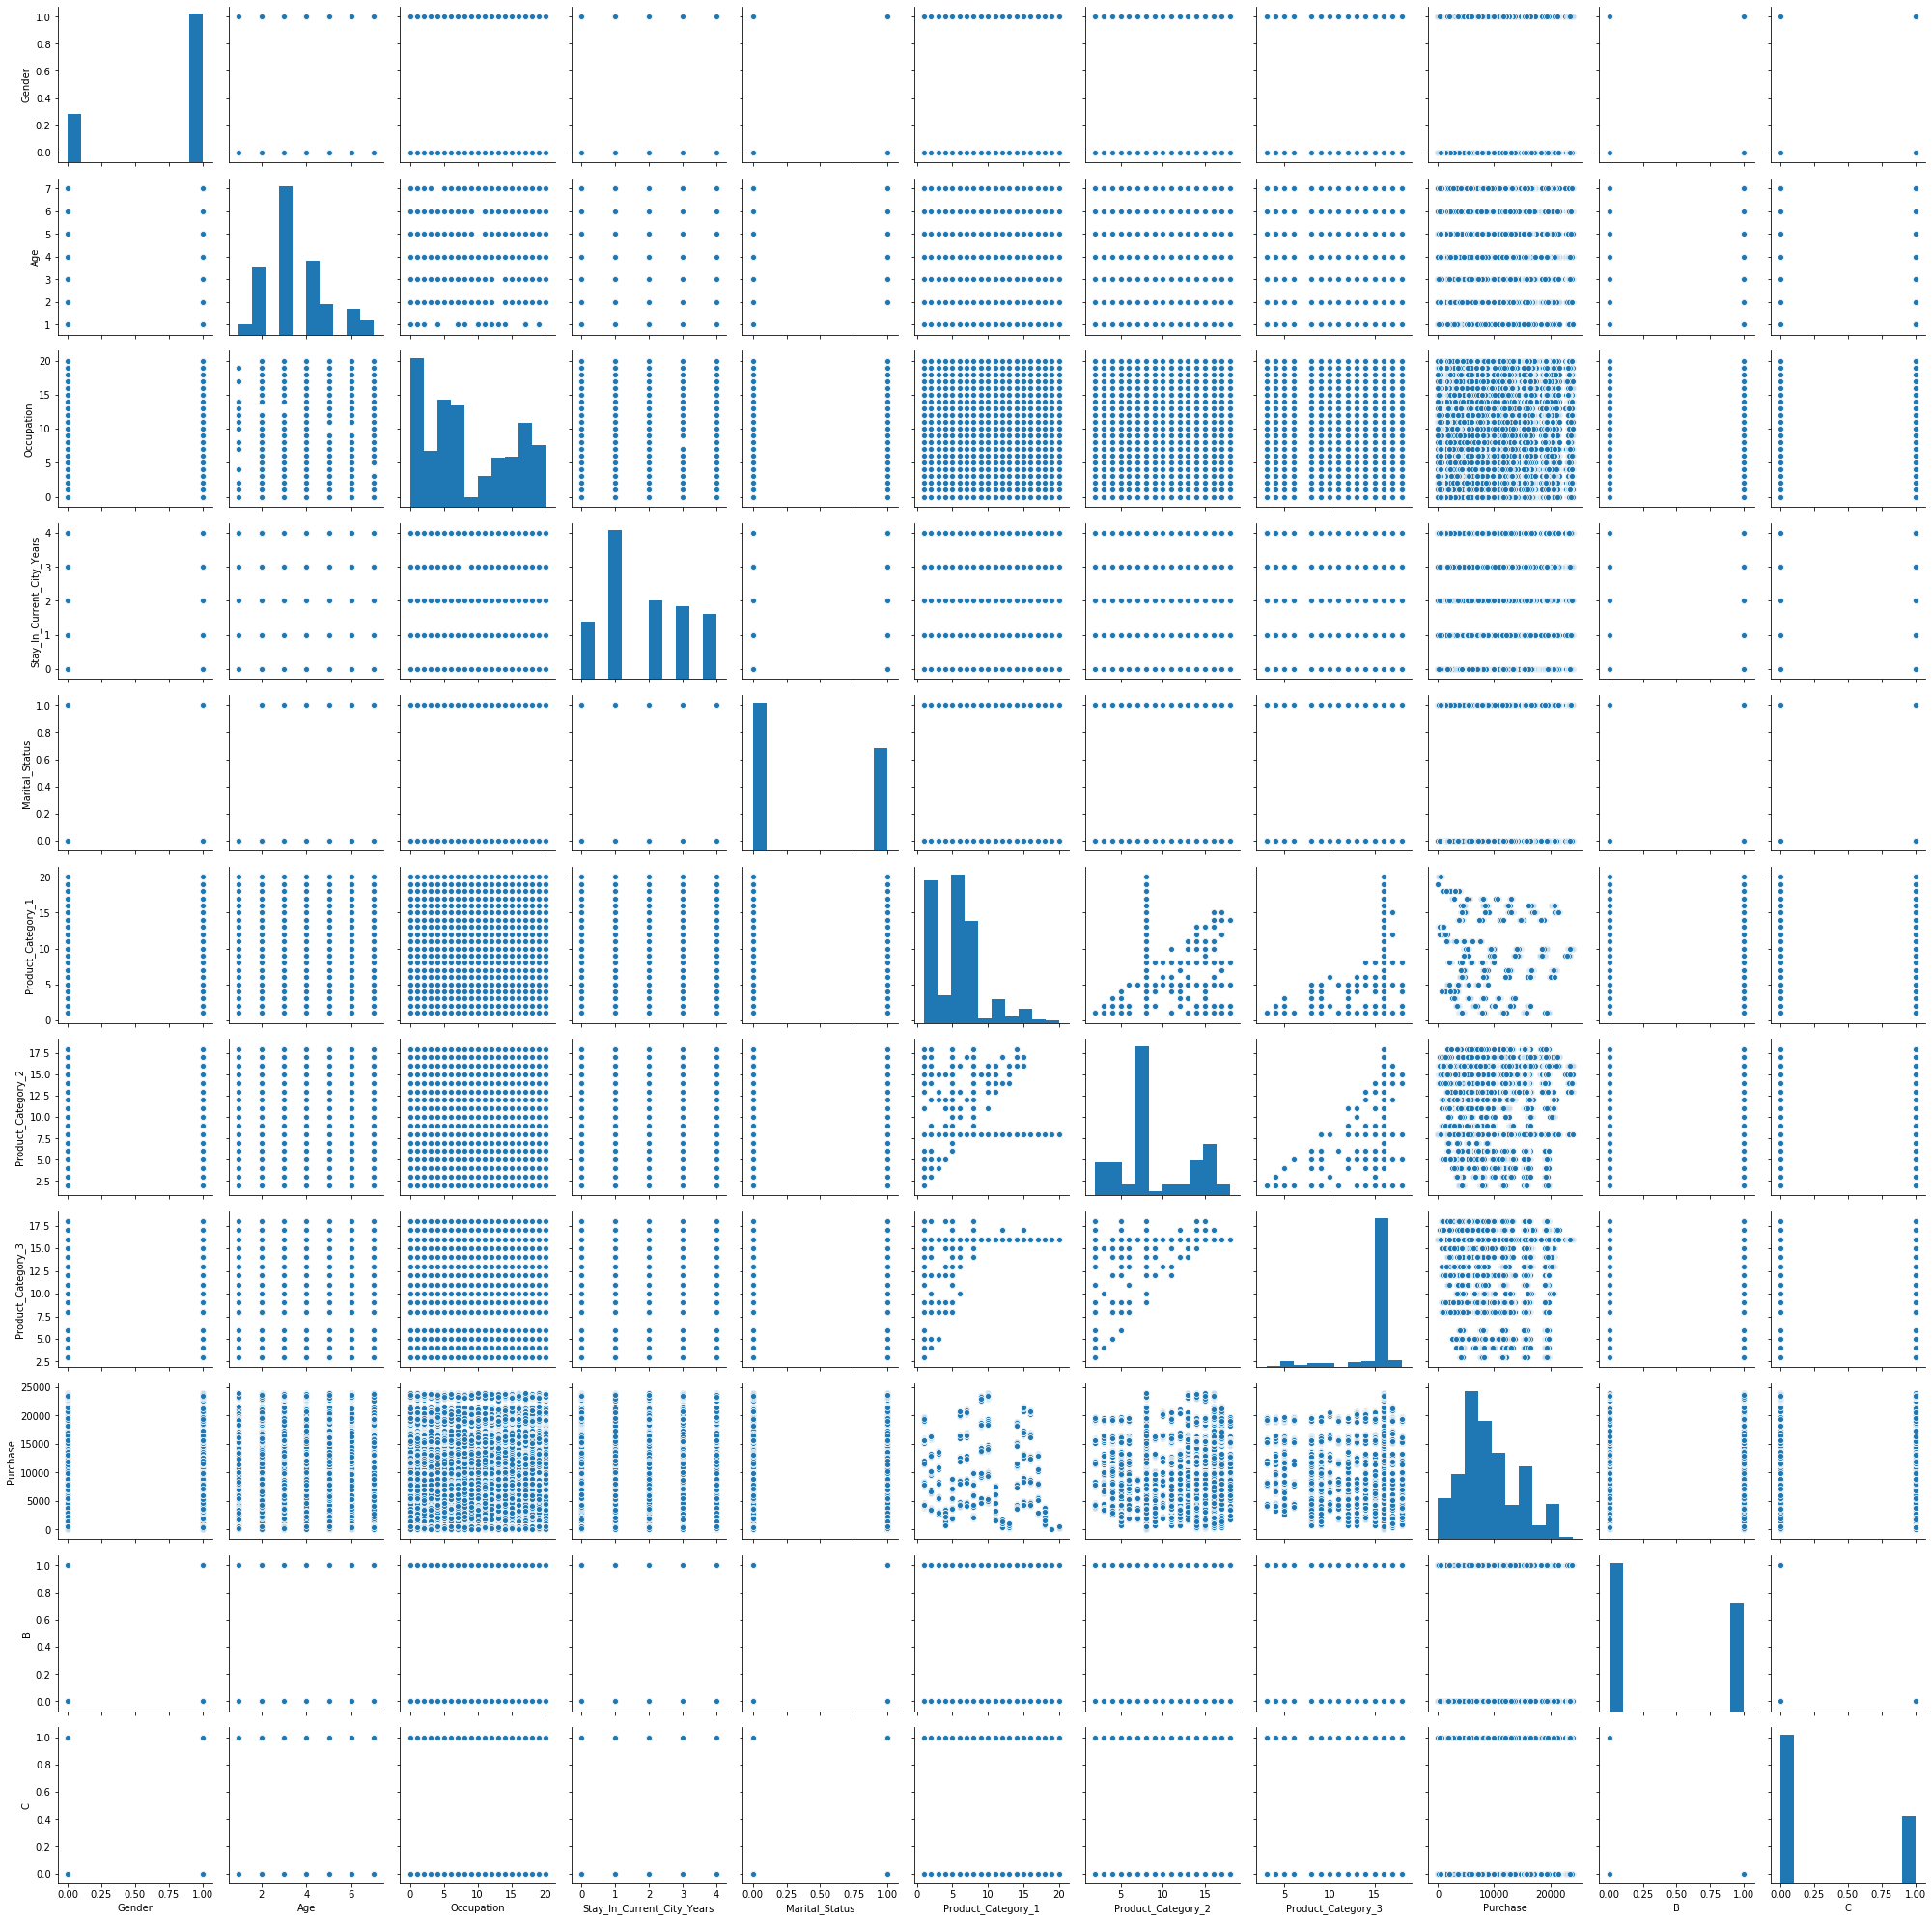

In [129]:
sns.pairplot(df) # plotting pair plot to understand correlation between variables

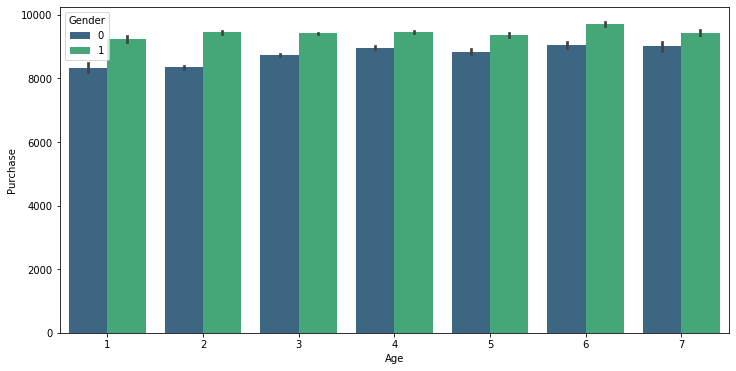

In [75]:
# plotting Age vs Purchage for Gender
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

Female = 0  
Male = 1  
From the graph, we can observe that Males have made more purchases than Females across all age groups

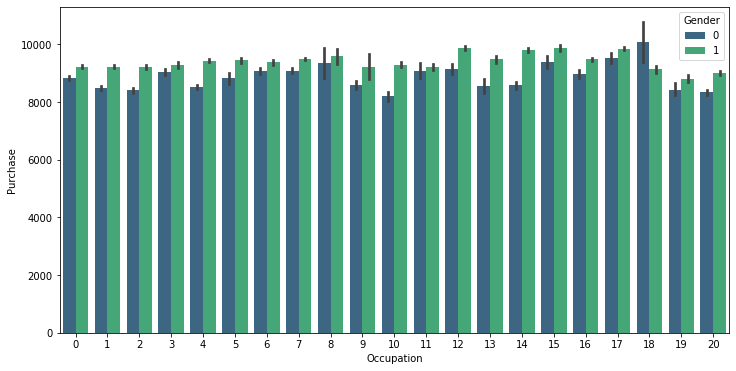

In [77]:
# plotting Occupation vs Purchage for Gender
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

Occupation 18 (Males) has the highest Purchase

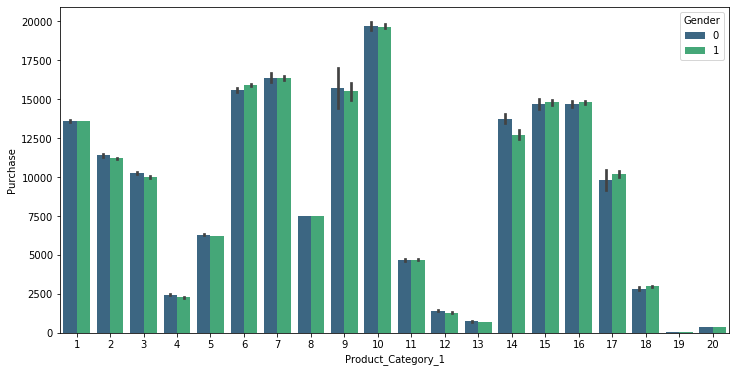

In [78]:
# plotting Product_Category_1 vs Purchage for Gender
sns.barplot('Product_Category_1', 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

Product Category 10 has the highest purchases and Category 19 has the minimum purchases

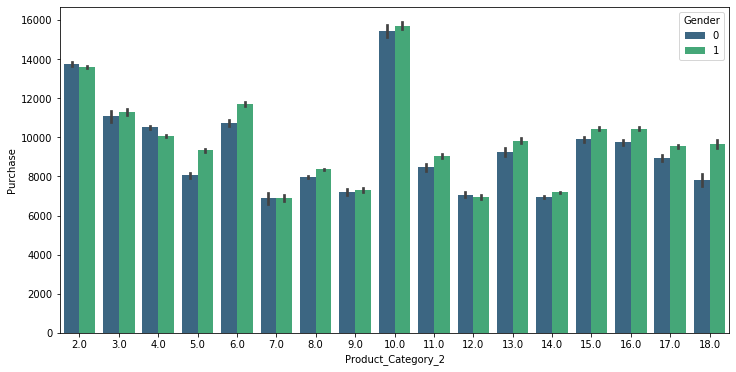

In [79]:
# plotting Product_Category_2 vs Purchage for Gender
sns.barplot('Product_Category_2', 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

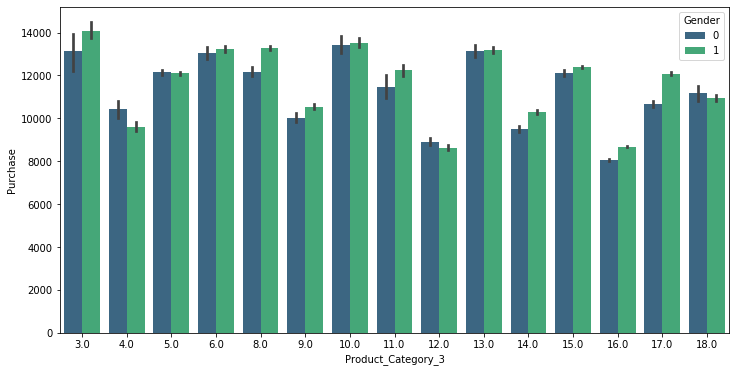

In [80]:
 # plotting Product_Category_3 vs Purchage for Gender
sns.barplot('Product_Category_3', 'Purchase', hue = 'Gender', data = df, palette = 'viridis')

### Feature Scaling

In [121]:
# keeping rows where 'Purchase' column is null, as it was the original test dataset
df_test = df[df['Purchase'].isnull()]

In [122]:
# keeping rows where 'Purchase' column is NOT null, as it was the original train dataset
df_train = df[~df['Purchase'].isnull()]
df_train = df_train.drop(['Product_ID'], axis = 1) # dropping Product_ID

In [123]:
X = df_train.drop(['Purchase'], axis = 1) # dropping Purchase column and assigning remaining dataset to X
Y = df_train['Purchase'] # assigning 'Purchase' column to variable Y

In [124]:
# import train_test_split
from sklearn.model_selection import train_test_split

# splitting dataset into train, test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 43)

In [125]:
# scaling the features in the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating StandardScaler object

X_train = sc.fit_transform(X_train) # fitting to train data
X_test = sc.transform(X_test) # fitting to test data

In [128]:
X_train # checking fitted train data

array([[ 0.57136687,  1.11227944,  0.90627708, ...,  0.36890735,
        -0.84951403,  1.48656481],
       [ 0.57136687, -0.36668663,  1.36607238, ...,  0.36890735,
        -0.84951403,  1.48656481],
       [ 0.57136687,  1.11227944,  1.82586767, ...,  0.36890735,
         1.17714359, -0.67269183],
       ...,
       [-1.75018899, -1.10616966, -0.93290411, ...,  0.36890735,
        -0.84951403, -0.67269183],
       [ 0.57136687, -0.36668663, -1.08616921, ...,  0.36890735,
        -0.84951403, -0.67269183],
       [ 0.57136687,  1.11227944,  1.36607238, ...,  0.36890735,
        -0.84951403,  1.48656481]])

In [131]:
X_train.shape # checking shape

(368545, 10)